In [1]:
# Import the main scripts (Benchmark internally imports the other scripts so you can just call this)
import sys
from pathlib import Path
sys.path.insert(1,  str(Path().resolve().parent / 'src')  ) # Do this to access the python scripts in src folder

from benchmark import *
import numpy as np

In [2]:
## Create Fake error_rate for 100 qbit hardware (that we made)
graph = nx.grid_graph(dim=[10,10])
n_p = 10

sig = .03
mu = 1e-2
sampg2 = sig*np.abs(np.random.randn(180)) + mu

n = 10 # row/column size (assume square)
err2 = {}
#edge_list_100 = []
for count, val in enumerate(graph.edges()):
    i, j = val[0][0], val[0][-1]
    k, l = val[1][0], val[1][-1]
    
    q1, q2 = mapind(i, j, n_p), mapind(k, l, n_p) # remap indices so each qubit has ONE assigned number
    
    err2[(q1,q2)] = sampg2[count]
    err2[(q2,q1)] = sampg2[count] # symmetric 2way errors
    #edge_list_100.append((q1,q2))
    
sig = .003
mu = 1e-3
sampg1 = sig*np.abs(np.random.randn(100)) + mu

err1 = {count : sampg1[count] for count in range(100)}
    

In [3]:
#!#
# Grab circuit locations
loc = str(Path().resolve().parent / 'benchmarks' / '_newcirc')
print(loc)

#!!#

# Create prop_arr for new set of circuits (if necc.)
#calc_properties(loc) # Saves to Path().resolve().parent / 'benchmarks' / 'data' / 'property array'

# Grab prop_arr
#prop_loc = str(Path().resolve().parent / 'benchmarks' / 'data' / 'property array' / 'circ_prop_with_depth_2020-08-20-15.28.53.npy')
prop_loc = str(Path().resolve().parent / 'benchmarks' / 'data' / 'property array' / 'circ_prop_2021-09-03-11.08.49.npy')
prop_arr = np.load(prop_loc, allow_pickle=True)

# Delete circuits that dont match hardware graph (in this case 16 qubit ones)
# and then populate circuit list
# prop_arr = np.delete(prop_arr, np.where( prop_arr['logical_qubit']==16)[0] )
circ_list = prop_arr['circuit']


#!!!#

# Need graph information defined
import networkx as nx

edges = hardware_edges('100qbit') # insert which hardware you need in argument
graph = nx.Graph()
graph.add_edges_from(edges)

n_p = len(graph) # number of graph qubits

#!!!!#

# Specify error rates if available for hardware graph
# If not available, ignore

#err_loc = str(Path().resolve().parent / 'examples' / 'IBM_qc_csv' / 'ibmq_16_melbourne(july-12).csv')

C:\work\__PAPERCORRECTIONS\QUBO-for-Qubit-Allocation\benchmarks\_newcirc


In [4]:
# Perform benchmarking

benchmark(circuit_list = circ_list,
          loc = loc,
          n_p = n_p,
          graph = graph,
          err1 = err1,
          err2 = err2,
          #err_graph = err_loc,
          num_samples = 1000)

0it [21:42, ?it/s]


KeyboardInterrupt: 

In [ ]:
# Benchmarking will save a numpy record array of the data from the run to '/benchmarks/data/benchmark array'
# Load that array below

bm_name = 'benchmark-results_2020-08-31-19.25.15.npy'
bm_arr = np.load( str(Path().resolve().parent / 'benchmarks' / 'data' / 'benchmark array' / bm_name), allow_pickle=True) # Need allow pickle



### MAKE CIRCUITS TO BENCHMARK (100 QUBITS + SHALLOW/DEEP CIRCUITS)

In [2]:
g1 = [10,100,1000,10000]
g2 = [10, 100, 1000, 10000]
qbit = 100

for x,y in zip(g1,g2):
    createcircuit(qbit, x, y)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[100];
h q[38];
h q[78];
h q[67];
h q[76];
h q[95];
h q[47];
h q[44];
h q[98];
h q[21];
h q[32];
cx q[16],q[48];
cx q[41],q[64];
cx q[40],q[32];
cx q[32],q[53];
cx q[29],q[71];
cx q[82],q[29];
cx q[41],q[90];
cx q[97],q[78];
cx q[36],q[89];
cx q[62],q[91];

C:\work\__PAPERCORRECTIONS\QUBO-for-Qubit-Allocation\benchmarks\_newcirc
OPENQASM 2.0;
include "qelib1.inc";
qreg q[100];
h q[12];
h q[43];
h q[18];
h q[73];
h q[71];
h q[32];
h q[73];
h q[41];
h q[28];
h q[79];
h q[77];
h q[32];
h q[55];
h q[3];
h q[23];
h q[46];
h q[11];
h q[69];
h q[39];
h q[5];
h q[87];
h q[23];
h q[91];
h q[3];
h q[6];
h q[26];
h q[18];
h q[74];
h q[22];
h q[24];
h q[91];
h q[76];
h q[89];
h q[66];
h q[50];
h q[50];
h q[64];
h q[97];
h q[62];
h q[99];
h q[9];
h q[37];
h q[18];
h q[47];
h q[8];
h q[79];
h q[14];
h q[84];
h q[85];
h q[76];
h q[37];
h q[22];
h q[55];
h q[62];
h q[53];
h q[86];
h q[5];
h q[66];
h q[95];
h q[99];
h q[74];
h q[85];
h q[96];
h q[73];
h q[81];


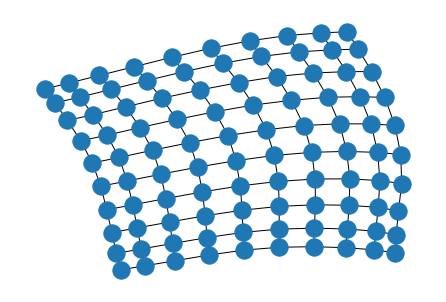

In [18]:
import networkx as nx

g = nx.grid_graph(dim=[10,10])

nx.draw(g)

In [26]:
g.edges()

EdgeView([((0, 0), (1, 0)), ((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 1), (0, 2)), ((0, 2), (1, 2)), ((0, 2), (0, 3)), ((0, 3), (1, 3)), ((0, 3), (0, 4)), ((0, 4), (1, 4)), ((0, 4), (0, 5)), ((0, 5), (1, 5)), ((0, 5), (0, 6)), ((0, 6), (1, 6)), ((0, 6), (0, 7)), ((0, 7), (1, 7)), ((0, 7), (0, 8)), ((0, 8), (1, 8)), ((0, 8), (0, 9)), ((0, 9), (1, 9)), ((1, 0), (2, 0)), ((1, 0), (1, 1)), ((1, 1), (2, 1)), ((1, 1), (1, 2)), ((1, 2), (2, 2)), ((1, 2), (1, 3)), ((1, 3), (2, 3)), ((1, 3), (1, 4)), ((1, 4), (2, 4)), ((1, 4), (1, 5)), ((1, 5), (2, 5)), ((1, 5), (1, 6)), ((1, 6), (2, 6)), ((1, 6), (1, 7)), ((1, 7), (2, 7)), ((1, 7), (1, 8)), ((1, 8), (2, 8)), ((1, 8), (1, 9)), ((1, 9), (2, 9)), ((2, 0), (3, 0)), ((2, 0), (2, 1)), ((2, 1), (3, 1)), ((2, 1), (2, 2)), ((2, 2), (3, 2)), ((2, 2), (2, 3)), ((2, 3), (3, 3)), ((2, 3), (2, 4)), ((2, 4), (3, 4)), ((2, 4), (2, 5)), ((2, 5), (3, 5)), ((2, 5), (2, 6)), ((2, 6), (3, 6)), ((2, 6), (2, 7)), ((2, 7), (3, 7)), ((2, 7), (2, 8)), ((2, 8), (3, 8)), 

In [27]:
qbit = 10
g2num = 5

g2 = [(x,y) for x,y in sample(range(qbit), 2) for num in range(g2num)]

TypeError: cannot unpack non-iterable int object

In [ ]:
## Use for comparing performance of diff cost functions

# # Get comparison plots for swap/success_prob metrics for two benchmark runs
# arr1 = gate_sp_d2 
# arr2 = gate_sp

# # Sort arrays so their data is all lined up
# prop_arr.sort(order='circuit')
# arr1.sort(order='circuit')
# arr2.sort(order='circuit')

# coef_judge(prop_arr, arr1['data_array'], arr2['data_array'], .01, label1='gate_sp_d2', label2='gate_sp', flip=False)